# Spatial Averaging

Authors: [Tom Vo](https://github.com/tomvothecoder/) & [Stephen Po-Chedley](https://github.com/pochedls/)

Updated: 11/07/24 [xcdat v0.7.3]

Related APIs: [xarray.Dataset.spatial.average()](../generated/xarray.Dataset.spatial.average.rst) & [xarray.Dataset.spatial.get_weights()](../generated/xcdat.spatial.SpatialAccessor.rst#xcdat.spatial.SpatialAccessor.get_weights)


## Overview

A common data reduction in geophysical sciences is to produce spatial averages. Spatial averaging functionality in xcdat allows users to quickly produce area-weighted spatial averages for selected regions (or full dataset domains).

In the example below, we will be working with the `"ersstv5"` dataset (NOAA’s Extended Reconstructed Sea Surface Temperature monthly averages) and demonstrating spatial averaging over the global, tropical, and Niño 3.4 domains. The data used in this example can be found in the [xarray-data repository](https://github.com/pydata/xarray-data).


### Notebook Kernel Setup

Users can [install their own instance of xcdat](../getting-started-guide/installation.rst) and follow these examples using their own environment (e.g., with VS Code, Jupyter, Spyder, iPython) or [enable xcdat with existing JupyterHub instances](../getting-started-guide/getting-started-hpc-jupyter.rst).

First, create the conda environment:

```bash
conda create -n xcdat_notebook -c conda-forge xcdat xesmf matplotlib ipython ipykernel cartopy nc-time-axis gsw-xarray jupyter pooch
```

Then install the kernel from the `xcdat_notebook` environment using `ipykernel` and name the kernel with the display name (e.g., `xcdat_notebook`):

```bash
python -m ipykernel install --user --name xcdat_notebook --display-name xcdat_notebook
```

Then to select the kernel `xcdat_notebook` in Jupyter to use this kernel.


## 1. Open the `Dataset`


In [1]:
# parameters
import xcdat as xc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ds = xc.tutorial.open_dataset("ersstv5", use_cftime=True)


## 2. Global average


In [2]:
# if you do not specify lat_bounds or lon_bounds, the averager will calculate the domain mean
ds_global_avg = ds.spatial.average("sst")

In [3]:
ds_global_avg.sst

<xarray.DataArray 'sst' (time: 624)> Size: 2kB
array([17.953865, 18.029905, 18.062468, 18.025848, 17.914612, 17.815054,
       17.882824, 18.040522, 17.97212 , 17.818205, 17.689465, 17.666115,
       17.767073, 17.807734, 17.857807, 17.85658 , 17.805096, 17.74715 ,
       17.89122 , 17.981539, 17.845783, 17.678413, 17.550447, 17.556803,
       17.812527, 17.992445, 17.988092, 18.002892, 17.886889, 17.913214,
       18.020473, 18.108864, 18.047565, 17.910303, 17.855112, 17.976498,
       18.074091, 18.160116, 18.165554, 18.097153, 18.020536, 17.949362,
       18.045088, 18.109842, 18.053806, 17.826382, 17.679522, 17.608122,
       17.753925, 17.84584 , 17.865913, 17.829567, 17.825968, 17.788239,
       17.915295, 18.058958, 17.97183 , 17.778582, 17.64869 , 17.67612 ,
       17.822762, 17.940023, 17.974585, 17.911299, 17.851942, 17.808435,
       17.919481, 17.997257, 17.915075, 17.657543, 17.516535, 17.526773,
       17.673752, 17.856453, 17.910295, 17.876583, 17.75849 , 17.812485,
       17.935896, 18.049269, 17.95112 , 17.865559, 17.80994 , 17.912653,
       18.07751 , 18.168797, 18.146044, 18.084862, 18.020071, 17.99183 ,
       18.06919 , 18.157753, 18.137754, 17.934256, 17.761963, 17.771965,
       17.943476, 18.047977, 18.091078, 18.007294, 17.932804, 17.946186,
       18.007835, 18.093529, 18.039457, 17.848124, 17.794943, 17.84451 ,
       17.988827, 18.10551 , 18.160133, 18.144194, 18.035444, 18.067598,
       18.13659 , 18.256617, 18.201097, 18.028233, 17.940619, 17.998795,
...
       18.458942, 18.577534, 18.506712, 18.287893, 18.130148, 18.150324,
       18.202383, 18.341743, 18.388336, 18.367088, 18.327888, 18.305481,
       18.478855, 18.586515, 18.475245, 18.256012, 18.148819, 18.128426,
       18.246515, 18.371193, 18.432896, 18.452652, 18.431625, 18.47705 ,
       18.567064, 18.709347, 18.618334, 18.366455, 18.208212, 18.224459,
       18.343441, 18.451633, 18.531845, 18.541769, 18.529764, 18.53843 ,
       18.653093, 18.77309 , 18.734447, 18.561052, 18.423464, 18.442307,
       18.61598 , 18.669188, 18.729467, 18.65332 , 18.56846 , 18.594204,
       18.698446, 18.781166, 18.675434, 18.46776 , 18.257357, 18.270746,
       18.45298 , 18.585695, 18.63528 , 18.596342, 18.513226, 18.525873,
       18.67721 , 18.767534, 18.617832, 18.413534, 18.255928, 18.214108,
       18.329145, 18.443802, 18.511751, 18.515078, 18.47011 , 18.446245,
       18.550194, 18.67688 , 18.623041, 18.479458, 18.334852, 18.345667,
       18.434664, 18.566238, 18.613308, 18.581924, 18.51917 , 18.575666,
       18.702099, 18.800182, 18.669218, 18.46503 , 18.347849, 18.354918,
       18.515312, 18.617144, 18.68672 , 18.657125, 18.553827, 18.546154,
       18.682737, 18.779703, 18.624775, 18.385149, 18.208141, 18.172585,
       18.273775, 18.397251, 18.465363, 18.44684 , 18.416115, 18.452179,
       18.61866 , 18.683695, 18.591637, 18.38583 , 18.270357, 18.230457],
      dtype=float32)
Coordinates:
  * time     (time) object 5kB 1970-01-01 00:00:00 ... 2021-12-01 00:00:00
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

Text(0, 0.5, 'Sea Surface Air Temperature [$^{\\circ}$C]')

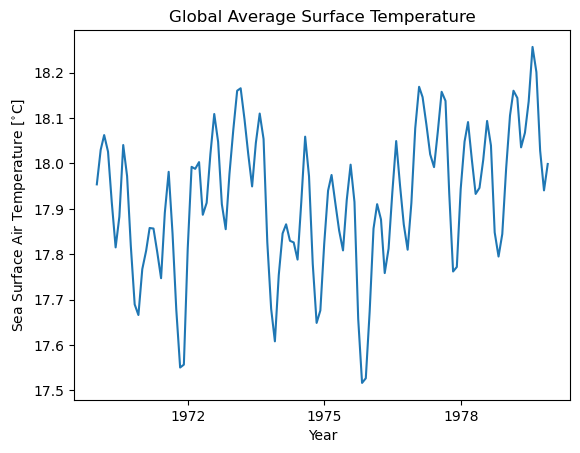

In [4]:
# Plot the first 120 time steps
ds_global_avg.sst.isel(time=slice(0, 120)).plot()
plt.title("Global Average Surface Temperature")
plt.xlabel("Year")
plt.ylabel("Sea Surface Air Temperature [$^{\\circ}$C]")

## 3. Tropical average


In [5]:
# compute the tropical average
ds_trop_avg = ds.spatial.average("sst", lat_bounds=(-25, 25))

Text(0, 0.5, 'Sea Surface Air Temperature [$^{\\circ}$C]')

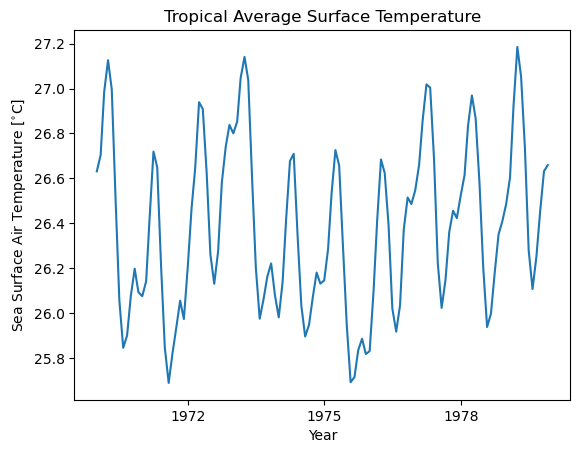

In [6]:
# Plot the first 120 time steps
ds_trop_avg.sst.isel(time=slice(0, 120)).plot()
plt.title("Tropical Average Surface Temperature")
plt.xlabel("Year")
plt.ylabel("Sea Surface Air Temperature [$^{\\circ}$C]")

## 4. Nino 3.4 Region

> Niño 3.4 (5N-5S, 170W-120W): The Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast. The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more."
>
> &mdash; <cite>https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni</cite>


In [7]:
# compute the nino 3.4 average
ds_nino_avg = ds.spatial.average("sst", lat_bounds=(-5, 5), lon_bounds=(190, 240))

In [8]:
ds_nino_avg

<xarray.Dataset> Size: 21kB
Dimensions:    (lat: 89, lon: 180, time: 624, bnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) object 5kB 1970-01-01 00:00:00 ... 2021-12-01 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 10kB 1970-01-01 00:00:00 ... 2022-01-01 00...
    sst        (time) float32 2kB 26.83 26.95 27.14 27.74 ... 25.77 25.76 25.54
    lon_bnds   (lon, bnds) float32 1kB -1.0 1.0 1.0 3.0 ... 357.0 357.0 359.0
    lat_bnds   (lat, bnds) float32 712B 89.0 87.0 87.0 ... -87.0 -87.0 -89.0
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

Text(0, 0.5, 'Sea Surface Air Temperature [$^{\\circ}$C]')

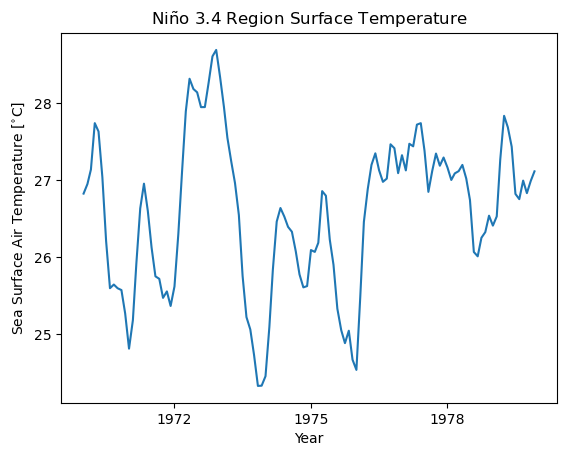

In [9]:
# Plot the first 120 time steps
ds_nino_avg.sst.isel(time=slice(0, 120)).plot()
plt.title("Ni$\\mathrm{\\tilde{n}}$o 3.4 Region Surface Temperature")
plt.xlabel("Year")
plt.ylabel("Sea Surface Air Temperature [$^{\\circ}$C]")

## 5. Retain / Inspect Spatial Weights

xCDAT can retain the weights used for spatial averaging using `keep_weights=True`. Here we retain and inspect these weights for the Niño 3.4 region. Note that along the edges of the Niño 3.4 box the weights are slightly less (since some grid cells are not fully in the averaging box and thus receive partial weight).


In [10]:
# recompute the nino 3.4 average, but retain weights
ds_nino_avg = ds.spatial.average(
    "sst", lat_bounds=(-5, 5), lon_bounds=(190, 240), keep_weights=True
)

Text(0.5, 1.0, 'Nino 3.4 Weights')

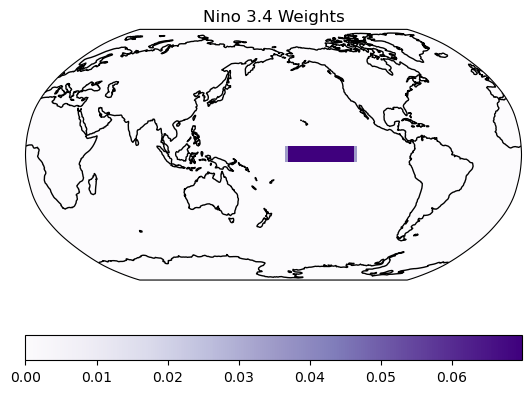

In [11]:
# plot the weights
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180.0))
plt.pcolor(
    ds_nino_avg.lon,
    ds_nino_avg.lat,
    ds_nino_avg.lat_lon_wts.T,
    transform=ccrs.PlateCarree(),
    cmap=plt.cm.Purples,
)
ax.coastlines()
plt.colorbar(orientation="horizontal")
plt.title("Nino 3.4 Weights")

## 6. Create and apply your own weights

Instead of having xcdat generate geospatial weights, you may want to create your own weights. You can pass your own weights into xcdat. Here we show an example of weighting the surface temperature data in the tropics by precipitation.

<div class="alert alert-block alert-warning"><b>Warning:</b> The lat_bounds and lon_bounds args are used when calculating axis weights, but is ignored if weights are supplied.</div>


In [12]:
# we will use the precip data as weights (zeroing out extratropical data)
weights = ds.sst.where(np.abs(ds.sst.lat) < 30, 0.0)
# and apply a cos(lat) weighting
weights = weights * np.cos(np.radians(ds.lat))
# compute precipitation weighted temperature
ds_pw = ds.spatial.average("sst", weights=weights)

/var/folders/_h/t3wvkks5643fxnv07_kx9cx8000zpt/T/ipykernel_30519/69120058.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(orientation="horizontal", ticks=[0, 0.0001, 0.0002, 0.0003, 0.0004])


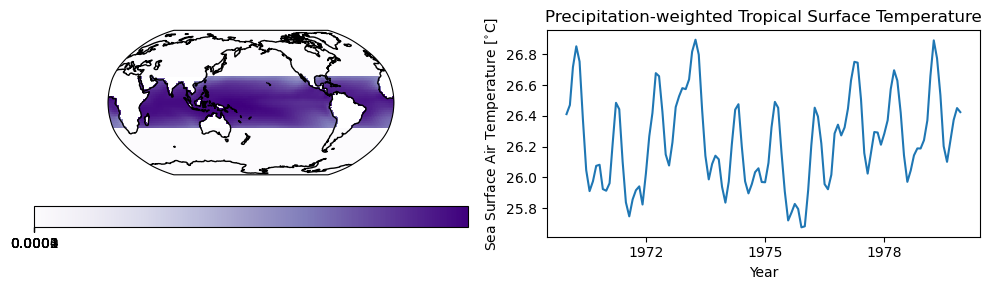

In [13]:
# plot the first timestep of the weights matrix
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.pcolor(
    ds.lon, ds.lat, weights[0], transform=ccrs.PlateCarree(), cmap=plt.cm.Purples
)
ax.coastlines()
plt.colorbar(orientation="horizontal", ticks=[0, 0.0001, 0.0002, 0.0003, 0.0004])
plt.subplot(1, 2, 2)
plt.title("Weights (time=")

# plot the first 120 time steps
ds_pw.sst[0:120].plot()
plt.title("Precipitation-weighted Tropical Surface Temperature")
plt.xlabel("Year")
plt.ylabel("Sea Surface Air Temperature [$^{\\circ}$C]")
plt.tight_layout()

## 7. Compute a zonal average

You do not need to average over both latitude and longitude. Here we show an example in which we take the zonal average (average over all longitude values).


In [14]:
# take zonal average
ds_zonal = ds.spatial.average("sst", axis=["X"])

Text(0.5, 1.0, 'Zonal Mean Surface Air Temperature')

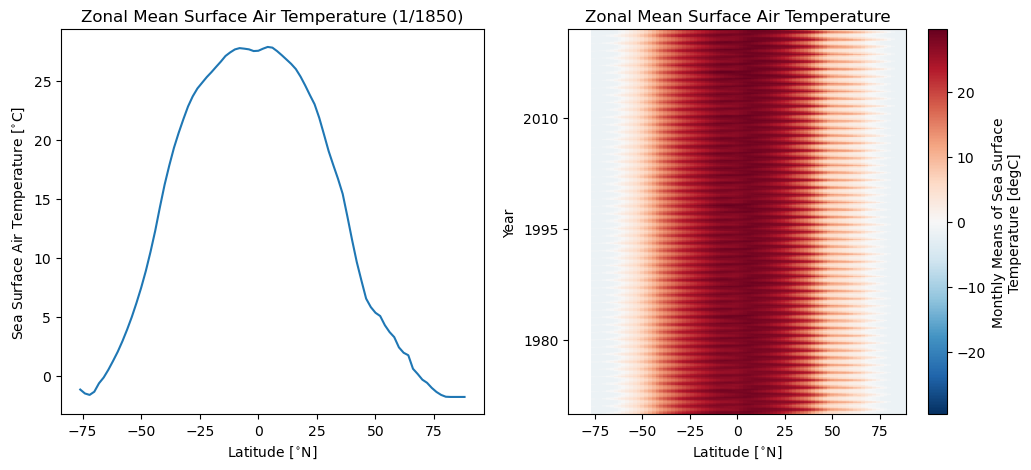

In [15]:
# plot first time step
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ds_zonal.sst[0].plot()
plt.ylabel("Sea Surface Air Temperature [$^{\\circ}$C]")
plt.xlabel("Latitude [$^{\\circ}$N]")
plt.title("Zonal Mean Surface Air Temperature (1/1850)")

# plot hovmoller
plt.subplot(1, 2, 2)
ds_zonal.sst.plot()
plt.xlabel("Latitude [$^{\\circ}$N]")
plt.ylabel("Year")
plt.title("Zonal Mean Surface Air Temperature")